# Bike Sharing Demand

## 데이터분석과 시각화, 머신러닝 알고리즘으로 시간당 자전거 대여량을 예측하기

이번 캐글 경진대회는 시간당 자전거 대여량을 예측하는 [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) 입니다. 워싱턴 D.C 소재의 자전거 대여 스타트업 [Capital Bikeshare](https://www.capitalbikeshare.com/)의 데이터를 활용하여, 특정 시간대에 얼마나 많은 사람들이 자전거를 대여하는지 예측하는 것이 목표입니다.

사람들이 자전거를 대여하는데는 많은 요소가 관여되어 있을 겁니다. 가령 시간(새벽보다 낮에 많이 빌리겠죠), 날씨(비가 오면 자전거를 대여하지 않을 겁니다), 근무일(근무 시간에는 자전거를 대여하지 않겠죠) 등. 이런 모든 요소를 조합하여 워싱턴 D.C의 자전거 교통량을 예측해주세요. 이번 경진대회에서는 기존까지 배웠던 프로그래밍 언어와 인공지능&머신러닝 능력 외에도, 자전거 렌탈 시장에 대한 약간의 전문지식, 그리고 일반인의 기초 상식을 총동원 할 수 있습니다.

저번 [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/) 경진대회와 마찬가지로, 이번에도 프로그래밍 언어 파이썬([Python](https://www.python.org/)), 데이터 분석 패키지 판다스([Pandas](https://pandas.pydata.org/)), 그리고 머신러닝&인공지능 라이브러리인 싸이킷런([scikit-learn](scikit-learn.org))을 사용합니다. 여기에 더불어, 이번에는 데이터 시각화 패키지 [matplotlib](https://matplotlib.org/)와 [Seaborn](https://seaborn.pydata.org/)을 본격적으로 활용해볼 것입니다.

## 컬럼 설명

(데이터는 [다음의 링크](https://www.kaggle.com/c/bike-sharing-demand/data)에서 다운받으실 수 있습니다)

  * **datetime** - 시간. 연-월-일 시:분:초 로 표현합니다. (가령 2011-01-01 00:00:00은 2011년 1월 1일 0시 0분 0초)
  * **season** - 계절. 봄(1), 여름(2), 가을(3), 겨울(4) 순으로 표현합니다.
  * **holiday** - 공휴일. 1이면 공휴일이며, 0이면 공휴일이 아닙니다.
  * **workingday** - 근무일. 1이면 근무일이며, 0이면 근무일이 아닙니다.
  * **weather** - 날씨. 1 ~ 4 사이의 값을 가지며, 구체적으로는 다음과 같습니다.
    * 1: 아주 깨끗한 날씨입니다. 또는 아주 약간의 구름이 끼어있습니다.
    * 2: 약간의 안개와 구름이 끼어있는 날씨입니다.
    * 3: 약간의 눈, 비가 오거나 천둥이 칩니다.
    * 4: 아주 많은 비가 오거나 우박이 내립니다.
  * **temp** - 온도. 섭씨(Celsius)로 적혀있습니다.
  * **atemp** - 체감 온도. 마찬가지로 섭씨(Celsius)로 적혀있습니다.
  * **humidity** - 습도.
  * **windspeed** - 풍속.
  * **casual** - 비회원(non-registered)의 자전거 대여량.
  * **registered** - 회원(registered)의 자전거 대여량.
  * **count** - 총 자전거 대여랑. 비회원(casual) + 회원(registered)과 동일합니다.

In [320]:
# 파이썬의 데이터 분석 패키지 Pandas(pandas.pydata.org) 를 읽어옵니다.
# Pandas는 쉽게 말해 파이썬으로 엑셀을 다룰 수 있는 툴이라고 보시면 됩니다.
# 이 패키지를 앞으로는 pd라는 축약어로 사용하겠습니다.
import pandas as pd

## Load Dataset

언제나처럼 모든 데이터 분석의 시작은 주어진 데이터를 읽어오는 것입니다. [판다스(Pandas)](https://pandas.pydata.org/)의 [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)를 활용하여 [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) 경진대회에서 제공하는 두 개의 데이터(train, test)를 읽어오겠습니다. ([다운로드 링크](https://www.kaggle.com/c/bike-sharing-demand/data))

앞서 [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/) 경진대회와 마찬가지로, 여기에서도 파일의 경로를 지정하는 방법에 주의하셔야 합니다. 만일 read_csv를 실행할 때 (**FileNotFoundError**)라는 이름의 에러가 난다면 경로가 제대로 지정이 되지 않은 것입니다. **파일의 경로를 지정하는 법이 생각나지 않는다면 [다음의 링크](http://88240.tistory.com/122)를 통해 경로를 지정하는 법을 복습한 뒤 다시 시도해주세요.**

In [321]:
# 판다스의 read_csv로 train.csv 파일을 읽어옵니다.
# 여기서 datetime은 특별히 날짜로 해석하기 위해 parse_dates 옵션에 넣어줍니다.
# 읽어온 데이터를 train이라는 이름의 변수에 할당합니다.
train = pd.read_csv("./train.csv", parse_dates=["datetime"])

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# head()로 train 데이터의 상위 5개를 띄웁니다.
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [322]:
# train.csv 파일을 읽어온 방식과 동일하게 test.csv를 읽어옵니다.
# 이후 이 데이터를 test라는 이름의 변수에 저장합니다.
test = pd.read_csv("./test.csv", parse_dates=["datetime"])

# 마찬가지로 행렬(row, column) 사이즈를 출력하고
print(test.shape)

# 전체 test 데이터에서 상위 5개만 출력합니다.
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## Preprocessing

데이터를 읽어왔으면, 이 데이터를 편하게 분석하고 머신러닝 알고리즘에 집어넣기 위해 간단한 전처리(Preprocessing) 작업을 진행하겠습니다.

[Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand)는 편리하게도 대부분의 데이터가 전처리 되어있습니다. (가령 season 컬럼은 봄을 spring이라 표현하지 않고 1이라고 표현합니다) 그러므로 [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/) 경진대회와는 달리 간단한 전처리만 끝내면 바로 머신러닝 모델에 데이터를 집어넣을 수 있습니다.

### Parse datetime

먼저 **날짜(datetime)** 컬럼을 전처리 하겠습니다.

날짜 컬럼은 얼핏 보면 여러개의 숫자로 구성되어 있습니다. (ex: 2011-01-01 00:00:00) 하지만 결론적으로 숫자는 아니며, 판다스에서는 문자열(object) 또는 날짜(datetime64)로 인식합니다. (값에 하이픈(-)과 콜론(:)이 있기 때문입니다) 그러므로 날짜(datetime) 컬럼을 사용하기 위해서는 머신러닝 알고리즘이 이해할 수 있는 방식으로 전처리를 해줘야 합니다.

날짜(datetime) 컬럼을 전처리하는 가장 쉬운 방법은 연, 월, 일, 시, 분, 초를 따로 나누는 것입니다. 가령 2011-01-01 00:00:00은 2011년 1월 1일 0시 0분 0초라고 볼 수 있으므로, 2011, 1, 1, 0, 0, 0으로 따로 나누면 총 6개의 숫자가 됩니다. 즉, **날짜(datetime) 컬럼을 여섯개의 다른 컬럼으로 나누어주는 것이 날짜 컬럼을 전처리하는 핵심입니다**.

In [323]:
# train 데이터에 연, 월, 일, 시, 분, 초를 나타내는 새로운 컬럼을 생성합니다.
# 각각의 이름을 datetime-year/month/day/hour/minute/second라고 가정합니다.
# 이 컬럼에 날짜(datetime) 컬럼의 dt(datetime의 약자입니다) 옵션을 활용하여 연월일시분초를 따로 넣어줍니다.
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second

# dayofweek는 날짜에서 요일(월~일)을 가져오는 기능입니다.
# 값은 0(월), 1(화), 2(수), 3(목), 4(금), 5(토), 6(일) 을 나타냅니다.
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# .head()로 train 데이터의 상위 5개를 띄우되,
# datetime과 이와 연관된 나머지 일곱 개의 컬럼만을 출력합니다.
train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second", "datetime-dayofweek"]].head()

(10886, 19)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-01 00:00:00,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,2011,1,1,4,0,0,5


In [324]:
# datetime-dayofweek를 사람이 이해하기 쉬운 표현으로 변경합니다. (Monday ~ Sunday)
# 이를 datetime-dayofweek(humanized)라는 새로운 컬럼에 추가합니다.
train.loc[train["datetime-dayofweek"] == 0, "datetime-dayofweek(humanized)"] = "Monday"
train.loc[train["datetime-dayofweek"] == 1, "datetime-dayofweek(humanized)"] = "Tuesday"
train.loc[train["datetime-dayofweek"] == 2, "datetime-dayofweek(humanized)"] = "Wednesday"
train.loc[train["datetime-dayofweek"] == 3, "datetime-dayofweek(humanized)"] = "Thursday"
train.loc[train["datetime-dayofweek"] == 4, "datetime-dayofweek(humanized)"] = "Friday"
train.loc[train["datetime-dayofweek"] == 5, "datetime-dayofweek(humanized)"] = "Saturday"
train.loc[train["datetime-dayofweek"] == 6, "datetime-dayofweek(humanized)"] = "Sunday"

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# .head()로 train 데이터의 상위 5개를 띄우되,
# datetime과 datetime-dayofweek, 그리고 datetime-dayofweek(humanized) 컬럼만을 출력합니다.
train[["datetime", "datetime-dayofweek", "datetime-dayofweek(humanized)"]].head()

(10886, 20)


,datetime,datetime-dayofweek,datetime-dayofweek(humanized)
0,2011-01-01 00:00:00,5,Saturday
1,2011-01-01 01:00:00,5,Saturday
2,2011-01-01 02:00:00,5,Saturday
3,2011-01-01 03:00:00,5,Saturday
4,2011-01-01 04:00:00,5,Saturday


In [325]:
# test 데이터와 train 데이터와 동일하게 연, 월, 일, 시, 분, 초 컬럼을 생성합니다.
test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second

# dayofweek 컬럼도 train 데이터와 동일하게 생성합니다.
test["datetime-dayofweek"] = test["datetime"].dt.dayofweek

# test 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(test.shape)

# .head()로 test 데이터의 상위 5개를 띄우되,
# datetime과 이와 연관된 나머지 일곱 개의 컬럼만을 출력합니다.
test[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second", "datetime-dayofweek"]].head()

(6493, 16)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-20 00:00:00,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,2011,1,20,4,0,0,3


In [326]:
# datetime-dayofweek를 사람이 이해하기 쉬운 표현으로 변경합니다. (Monday ~ Sunday)
# 이를 datetime-dayofweek(humanized)라는 새로운 컬럼에 추가합니다.
test.loc[test["datetime-dayofweek"] == 0, "datetime-dayofweek(humanized)"] = "Monday"
test.loc[test["datetime-dayofweek"] == 1, "datetime-dayofweek(humanized)"] = "Tuesday"
test.loc[test["datetime-dayofweek"] == 2, "datetime-dayofweek(humanized)"] = "Wednesday"
test.loc[test["datetime-dayofweek"] == 3, "datetime-dayofweek(humanized)"] = "Thursday"
test.loc[test["datetime-dayofweek"] == 4, "datetime-dayofweek(humanized)"] = "Friday"
test.loc[test["datetime-dayofweek"] == 5, "datetime-dayofweek(humanized)"] = "Saturday"
test.loc[test["datetime-dayofweek"] == 6, "datetime-dayofweek(humanized)"] = "Sunday"

# test 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(test.shape)

# .head()로 test 데이터의 상위 5개를 띄우되,
# datetime과 datetime-dayofweek, 그리고 datetime-dayofweek(humanized) 컬럼만을 출력합니다.
test[["datetime", "datetime-dayofweek", "datetime-dayofweek(humanized)"]].head()

(6493, 17)


,datetime,datetime-dayofweek,datetime-dayofweek(humanized)
0,2011-01-20 00:00:00,3,Thursday
1,2011-01-20 01:00:00,3,Thursday
2,2011-01-20 02:00:00,3,Thursday
3,2011-01-20 03:00:00,3,Thursday
4,2011-01-20 04:00:00,3,Thursday


## Explore

전처리(Preprocesing)를 끝냈으면 그 다음에는 데이터를 분석해보겠습니다.

주어진 데이터를 시각화나 분석 툴을 통해 다양한 관점에서 이해하는 과정을 탐험적 데이터 분석([Exploratory Data Analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis))이라고 합니다. 저번 타이타닉 문제와 마찬가지로, 이번에도 파이썬의 데이터 시각화 패키지인 ([matplotlib](https://matplotlib.org))와 [seaborn](https://seaborn.pydata.org/) 을 활용해서 분석해보겠습니다.

In [327]:
# matplotlib로 실행하는 모든 시각화를 자동으로 쥬피터 노트북에 띄웁니다.
# seaborn 도 결국에는 matplotlib를 기반으로 동작하기 때문에, seaborn으로 실행하는 모든 시각화도 마찬가지로 쥬피터 노트북에 자동적으로 띄워집니다.
%matplotlib inline

# 데이터 시각화 패키지 seaborn을 로딩합니다. 앞으로는 줄여서 sns라고 사용할 것입니다.
import seaborn as sns

# 데이터 시각화 패키지 matplotlib를 로딩합니다. 앞으로는 줄여서 plt라고 사용할 것입니다.
import matplotlib.pyplot as plt

### datetime

먼저 분석할 컬럼은 **날짜(datetime)** 컬럼입니다. 날짜 컬럼은 [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) 경진대회의 핵심 컬럼이라고 볼 수 있으며, 이번 경진대회에서 상위 성적을 올리고 싶다면 날짜 컬럼을 완벽하게 이해하는 것이 무엇보다도 중요합니다.

먼저 연/월/일/시/분/초에 따른 자전거 대여량을 시각화 해보겠습니다.

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

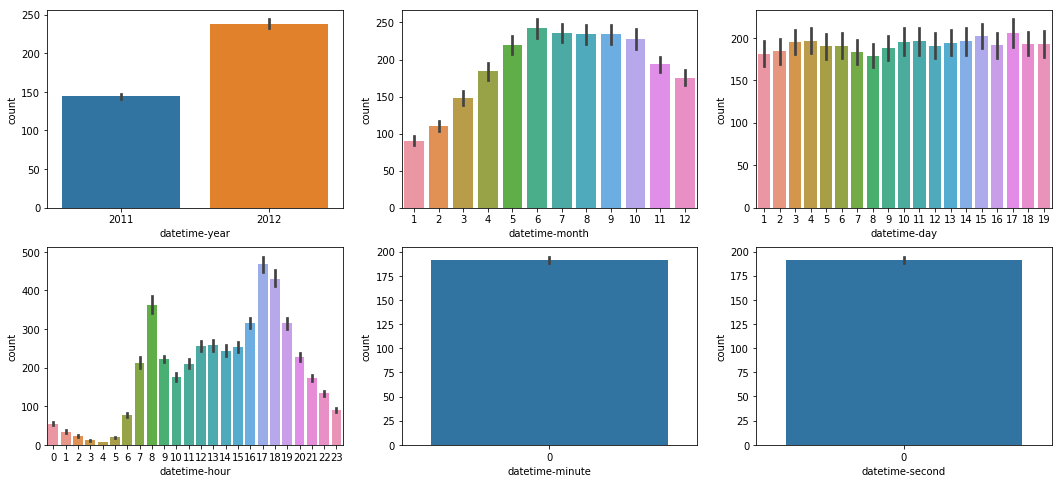

In [328]:
# matplotlib의 subplots를 사용합니다. 이 함수는 여러 개의 시각화를 한 화면에 띄울 수 있도록 합니다.
# 이번에는 2x3으로 총 6개의 시각화를 한 화면에 띄웁니다.
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)

# 시각화의 전체 사이즈는 18x8로 설정합니다.
figure.set_size_inches(18, 8)

# seaborn의 barplot으로 subplots의 각 구역에
# 연, 월, 일, 시, 분, 초 별 자전거 대여량을 출력합니다.
sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)
sns.barplot(data=train, x="datetime-minute", y="count", ax=ax5)
sns.barplot(data=train, x="datetime-second", y="count", ax=ax6)

위 그림에서 알 수 있는 내용은 다음과 같습니다.

**datetime-year**
  * 2011년도의 자전거 대여량보다 2012년도의 자전거 대여량이 더 높습니다. 이는 [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) 경진대회를 주최한 [Capital Bikeshare](https://www.capitalbikeshare.com/)사가 꾸준히 성장하고 있다고 간주할 수 있습니다.

**datetime-month**
  * 주로 여름(6~8월)에 자전거를 많이 빌리며, 겨울(12~2월)에는 자전거를 많이 빌리지 않습니다.
  * 같은 겨울이라도 12월의 자전거 대여량이 1월의 자전거 대여량보다 두 배 가까이 높아 보입니다. 하지만 여기에는 숨겨진 비밀이 있는데, 다음에 나올 다른 시각화에서 자세히 살펴보겠습니다.
  
**datetime-day**
  * x축을 자세히 보면 1일부터 19일까지밖에 없습니다. 20일은 어디에 있을까요? 바로 test 데이터에 있습니다. 이 시각화에서 알 수 있는 내용은, train 데이터와 test 데이터를 나누는 기준이 되는 컬럼이 바로 **datetime-day**라는 것입니다.
  * 이런 경우 **datetime-day**를 feature로 집어넣으면 머신러닝 알고리즘이 과적합([overfitting](https://hyperdot.wordpress.com/2017/02/06/%EA%B3%BC%EC%A0%81%ED%95%A9overfitting/)) 되는 현상이 일어날 수 있습니다. **그러므로 train 데이터와 test 데이터를 나누는 기준이 되는 컬럼이 있으면, 이 컬럼은 feature로 사용하지 않는 것이 좋습니다.**

**datetime-hour**
  * 새벽 시간에는 사람들이 자전거를 빌리지 않으며, 오후 시간에 상대적으로 자전거를 많이 빌립니다.
  * 특이하게도 두 부분에서 사람들이 자전거를 특별히 많이 빌리는 현상이 있습니다. 바로 출근 시간(7~9시)과 퇴근 시간(16시~19시) 입니다.
  * 물론 출퇴근시간이 아닌 다른 시간대에 자전거를 빌리는 경우도 존재합니다. 이는 다음에 나올 다른 시각화에서 자세히 살펴보겠습니다.

**datetime-minute** & **datetime-second**
  * 이 두 컬럼은 x축이 모두 0으로 되어있습니다. 즉, **datetime-minute**과 **datetime-second**은 기록되고 있지 않다는 사실을 알 수 있습니다. 이 경우에는 feature로 넣어도 큰 의미가 없기 때문에 사용하지 않습니다.
  
  
그러므로 이 시각화에서 알 수 있는 결론은, **전체 여섯개의 컬럼 중 datetime-year와 datetime-month, 그리고 datetime-hour만 사용하는 것이 가장 좋다는 사실을 깨달을 수 있습니다.**

### datetime-year & datetime-month

다음에는 연-월을 붙여서 시각화해보겠습니다.

이전에는 연/월을 따로 시각화해서 출력하였지만, 이번에는 연-월을 붙여서 2011년 1월부터 2012년 12월까지 총 24개의 경우의 수를 x축으로 놓고 시각화해보고 싶습니다. 먼저 이를 시각화하기에 필요한 **datetime-year_month**라는 새로운 컬럼을 만들어 보겠습니다.

In [329]:
# datetime-year와 datetime-month의 형태를 변환합니다.
# 이전까지는 정수형(int)였지만, pandas의 astype을 통해 문자열(str)로 변환합니다.
# 이 결과를 datetime-year(str)와 datetime-month(str)라는 새로운 컬럼에 집어넣습니다.
train["datetime-year(str)"] = train["datetime-year"].astype('str')
train["datetime-month(str)"] = train["datetime-month"].astype('str')

# datetime-year(str)와 datetime-month(str) 문자열 두 개를 붙여서 datetime-year_month라는 새로운 컬럼을 추가합니다.
# 이 컬럼에는 2011-1부터 2012-12까지의 총 24의 경우의 수가 들어갑니다.
train["datetime-year_month"] = train["datetime-year(str)"] + "-" + train["datetime-month(str)"]

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# .head() train 데이터의 상위 5개를 띄우되,
# datetime과 datetime-year_month 두 개의 컬럼만 출력합니다.
train[["datetime", "datetime-year_month"]].head()

(10886, 23)


,datetime,datetime-year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

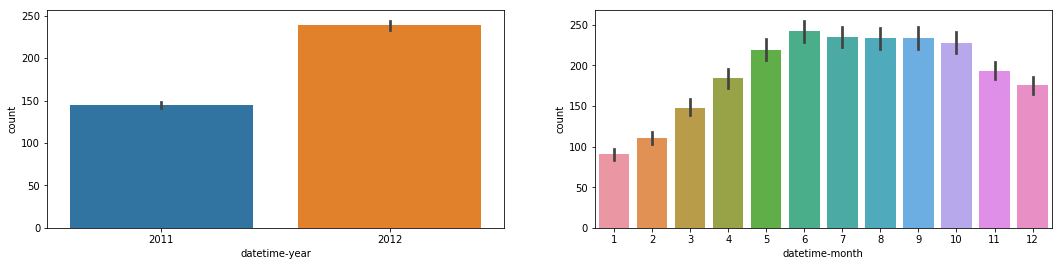

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

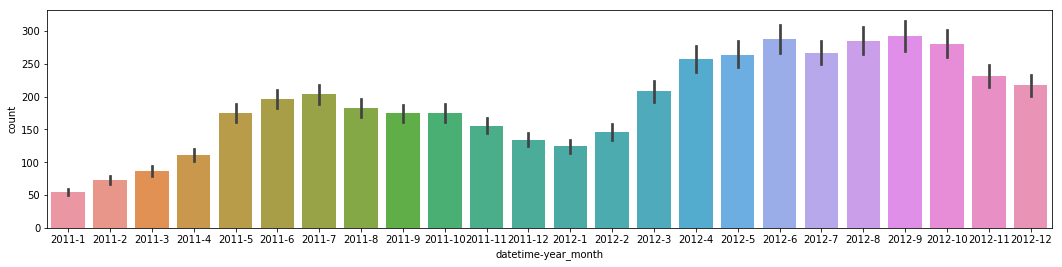

In [330]:
# matplotlib의 subplots를 사용합니다. 이 함수는 여러 개의 시각화를 한 화면에 띄울 수 있도록 합니다.
# 이번에는 1x2로 총 2개의 시각화를 한 화면에 띄웁니다.
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

# 시각화의 전체 사이즈는 18x4로 설정합니다.
figure.set_size_inches(18, 4)

# seaborn의 barplot으로 subplots의 각 구역에
# 연, 월별 자전거 대여량을 출력합니다.
sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)

# 다시 한 번 matplotlib의 subplots를 사용합니다.
# 이번에는 1x1로 1개의 시각화만을 출력합니다.
figure, ax3 = plt.subplots(nrows=1, ncols=1)

# 이 시각화의 전체 사이즈는 18x4로 설정합니다.
figure.set_size_inches(18, 4)

# 이번에는 seaborn의 barplot으로 연-월을 붙여서 자전거 대여량을 출력합니다.
sns.barplot(data=train, x="datetime-year_month", y="count", ax=ax3)

위 그림에서 알 수 있는 내용은 다음과 같습니다.

  * [Capital Bikeshare](https://www.capitalbikeshare.com/)사의 자전거 대여량은 꾸준히 상승하고 있는 추세입니다.
  * 우상단 시각화를 보자면, 12월의 자전거 대여량이 1월의 자전거 대여량보다 두 배 가까이 높습니다.
  * 하지만 아래의 시각화를 보면, 2011년 12월의 자전거 대여량과 2012년 1월의 자전거 대여량이 큰 차이가 없다는 사실을 발견할 수 있습니다.
  * 반면에 2011년 1월의 자전거 대여량과 2012년 12월의 자전거 대여량은 큰 차이가 나는 것을 알 수 있습니다.
  
즉, 12월이 1월에 비해 자전거 대여량이 두 배 가까이 높은 이유는, 1) [Capital Bikeshare](https://www.capitalbikeshare.com/)의 자전거 대여량이 꾸준히 상승하고 있는 추세이며, 2) 이 과정에서 시기상으로 12월이 1월부터 늦게 발생했기 때문입니다. 즉 **자전거를 대여하는 고객 입장에서 12월이라고 자전거를 더 많이 빌려야 할 이유는 없습니다.**

이 점 역시 머신러닝 알고리즘이 과적합(overfitting)될 소지가 다분합니다. 이를 해결할 수 있는 다양한 방법이 있는데,

  * **datetime-year_month**를 통채로 One Hot Encoding해서 feature로 사용한다.
  * 자전거 대여량이 꾸준히 성장하는 추세에 맞춰서 count를 보정한다.
  
하지만 제 경험상, 가장 쉽과 빠르게 머신러닝 모델의 정확도를 늘리는 방법은 **datetime-month**를 feature로 사용하지 않는 것입니다. 그러므로 **연/월/일/시/분/초 여섯 개의 컬럼 중 연도(datetime-year)와 시간(datetime-hour), 이렇게 두 개의 컬럼만 사용하도록 하겠습니다.**

### datetime-hour

다음에는 **datetime-hour** 컬럼을 분석해보겠습니다.

이번에는 **datetime-hour** 컬럼 외에도 두 개의 컬럼을 추가로 분석하겠습니다. 바로 근무일(workingday)와 요일(datetime-dayofweek)입니다.


/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/PJS/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: Us

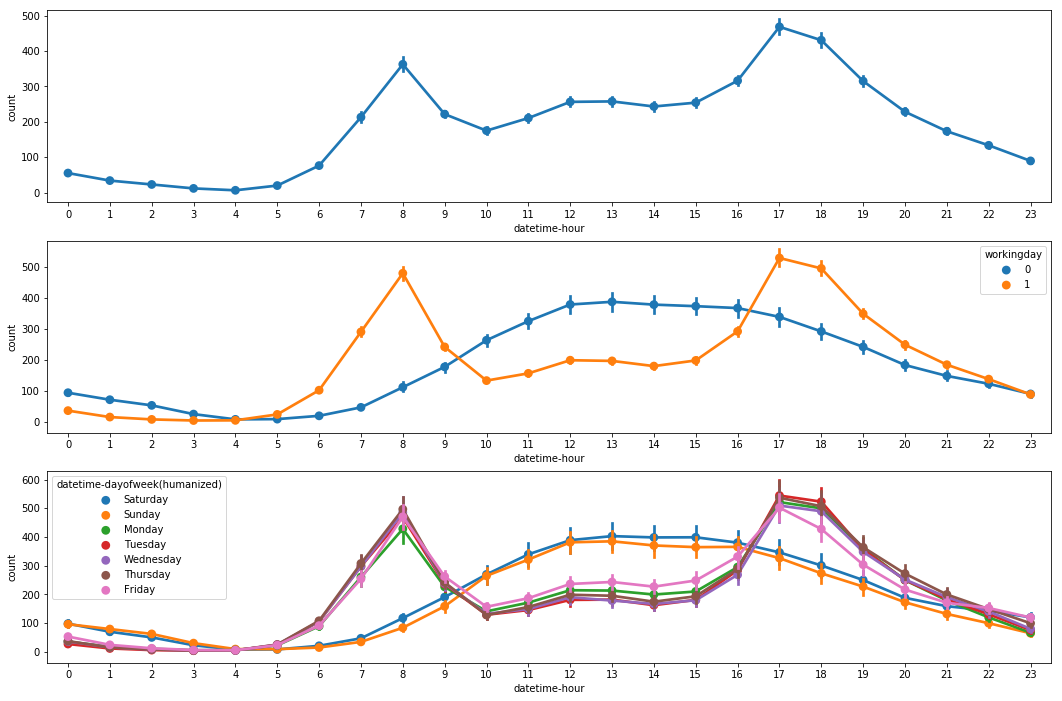

In [331]:
# matplotlib의 subplots를 사용합니다. 이 함수는 여러 개의 시각화를 한 화면에 띄울 수 있도록 합니다.
# 이번에는 3x1로 총 3개의 시각화를 한 화면에 띄웁니다.
figure, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)

# 시각화의 전체 사이즈는 18x12로 설정합니다.
figure.set_size_inches(18, 12)

# seaborn의 pointplot으로 시각당 자전거 대여량을 시각화합니다.
sns.pointplot(data=train, x="datetime-hour", y="count", ax=ax1)

# 비슷하게 seaborn의 pointplot으로 시각당 자전거 대여량을 시각화합니다.
# 하지만 이번에는 근무일(workingday)에 따른 차이를 보여줍니다.
sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax2)

# 비슷하게 seaborn의 pointplot으로 시각당 자전거 대여량을 시각화합니다.
# 하지만 이번에는 요일(datetime-dayofweek)에 따른 차이를 보여줍니다.
sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek(humanized)", ax=ax3)

위 그림에서 알 수 있는 내용은 다음과 같습니다.

  * 사람들은 기본적으로 출근 시간(7~9시)과 퇴근 시간(16~19시)에 자전거를 많이 빌립니다.
  * 하지만 이는 근무일일 경우(workingday == 1)에만 한정된 이야기입니다. 근무일이 아닐 경우(workingday == 0), 사람들은 출/퇴근시간에 자전거를 빌리지 않고, 오후 시간(10 ~ 16시)에 자전거를 많이 빌리는 것을 확인할 수 있습니다.

이번에는 **요일(datetime-dayofweek)**별 자전거 대여량을 살펴보겠습니다.

  * 먼저 금요일을 살펴보면, 다른 주중(월~목)에 비해 퇴근 시간(17~19시)에 상대적으로 자전거를 덜 빌리는 사실을 알 수 있습니다. 이는 추측컨데 모종의 이유로 자전거를 탈 수 없거나(ex: 음주), 다른 교통수단(ex: 버스, 택시)을 대신 사용했다는 것을 알 수 있습니다.
  * 반면 금요일은 주중임에도 불구하고 상대적으로 오후 시간(10~16시)의 자전거 대여량이 높은 것을 알 수 있습니다. 그 다음으로 높은 주중은 바로 월요일입니다. 즉, 금요일과 월요일은 주중임에도 불구하고 어느정도 주말의 속성을 가지고 있다는 사실을 알 수 있습니다.
  * 이번에는 주말을 살펴보겠습니다. 일요일을 보자면, 토요일에 비해 상대적으로 자전거 대여량이 낮다는 사실을 알 수 있습니다. 이는 추측컨데 월요일의 피로도를 고려해서 토요일에 비해 대외 활동을 덜 가지는 것으로 생각할 수 있습니다.
  
이 분석을 통해 알 수 있는 사실은, 요일(datetime-dayofweek)을 머신러닝 알고리즘에 feature로 집어넣으면 근무일(workingday)만 집어넣는 것에 비해 더 좋은 성능을 낼 수 있다고 볼 수 있습니다. 그러므로 **요일(datetime-dayofweek)** 컬럼을 feature로 추가하겠습니다.

## Train

이제 분석을 통해 발견한 인사이트를 활용해보겠습니다.

이전 경진대회와 마찬가지로, 이번에도 머신러닝 알고리즘을 사용하겠습니다. 이번에도 변함없이 [지도학습(Supervised Learning)](http://solarisailab.com/archives/1785) 알고리즘을 사용할 계획이기 때문에, 데이터를 Label(맞춰야 하는 정답)과 Feature(Label을 맞추는데 도움이 되는 값들)로 나눌 필요가 있습니다.

이번 경진대회에서는 다음의 컬럼들을 Feature와 Label로 활용할 것입니다.

  * **Feature**: 1) 계절(season), 2) 공휴일(holiday), 3) 근무일(workingday), 4) 날씨(weather), 5) 온도(temp), 6) 체감 온도(atemp), 7) 습도(humidity), 8) 풍속(weather), 9) 연도(datetime-year), 10) 시간(datetime-hour), 마지막으로 11) 요일(datetime-dayofweek) 입니다.
  
  * **Label**: 자전거 대여량(count)을 사용합니다.
  
이를 통해 train 데이터와 test 데이터를 다음의 세 가지 형태의 값으로 나눌 것입니다.

  * **X_train**: train 데이터의 feature 입니다. 줄여서 X_train이라고 부릅니다.
  * **X_test**: test 데이터의 feature 입니다. 마찬가지로 줄여서 X_test라고 부릅니다.
  * **y_train**: train 데이터의 label 입니다. 마찬가지로 줄여서 y_train이라고 부릅니다.

In [332]:
# 총 11개의 컬럼을 feature를 지정합니다.
# 이 11개의 컬럼명을 feature_names라는 이름의 파이썬 리스트(list)로 만들어 변수에 할당합니다.
feature_names = ["season", "holiday", "workingday", "weather",
                 "temp", "atemp", "humidity", "windspeed",
                 "datetime-year", "datetime-hour", "datetime-dayofweek"]
feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'datetime-year',
 'datetime-hour',
 'datetime-dayofweek']

In [333]:
# 자전거 대여량(count)을 label로 지정합니다.
# count라는 이름의 컬럼을 label_name 이라는 이름의 변수에 할당합니다.
label_name = "count"
label_name

'count'

In [334]:
# feature_names를 활용해 train 데이터의 feature를 가져옵니다.
# 이를 X_train이라는 이름의 변수에 할당합니다.
X_train = train[feature_names]

# X_train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(X_train.shape)

# X_train 데이터의 상위 5개를 띄웁니다.
X_train.head()

(10886, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,2011,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,5
2,1,0,0,1,9.02,13.635,80,0.0,2011,2,5
3,1,0,0,1,9.84,14.395,75,0.0,2011,3,5
4,1,0,0,1,9.84,14.395,75,0.0,2011,4,5


In [335]:
# feature_names를 활용해 test 데이터의 feature를 가져옵니다.
# 이를 X_test라는 이름의 변수에 할당합니다.
X_test = test[feature_names]

# X_test 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(X_test.shape)

# X_test 데이터의 상위 5개를 띄웁니다.
X_test.head()

(6493, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,3


In [336]:
# label_name을 활용해 train 데이터의 label을 가져옵니다.
# 이를 y_train이라는 이름의 변수에 할당합니다.
y_train = train[label_name]

# y_train 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시되나, column이 없기 때문에 (row,) 형태로 표시될 것입니다.
print(y_train.shape)

# y_train 데이터의 상위 5개를 띄웁니다.
y_train.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

### Use Random Forest

X_train, X_test, y_train 데이터를 만들었으면, 이제 이 데이터를 활용하여 머신러닝 알고리즘을 학습시켜 보겠습니다.

이번에 사용할 알고리즘은 랜덤 포레스트(Random Forest)입니다. 랜덤 포레스트는 의사결정나무(Decision Tree)의 업그레이드 버전이라고 볼 수 있는데, 대부분의 경우 의사결정나무보다 더 좋은 성능을 보장합니다. 알고리즘의 동작 원리는 다음과 같습니다.

  1. 먼저 전체 데이터가 아니라, 데이터의 일부분을 랜덤하게 가져옵니다. 이를 랜덤 샘플링, 또는 베깅([bootstrap aggregating](https://en.wikipedia.org/wiki/Bootstrap_aggregating))이라고 합니다. 이렇게 랜덤 샘플링한 데이터로 의사결정나무(Decision Tree)를 하나 만듭니다.
  2. 1번의 방식을 사용하면 이론적으로 무제한의 다양한 트리를 만들 수 있습니다. 이 트리를 지정한 갯수만큼 생성합니다.
  3. 생성한 트리끼리 투표를 합니다. 가령 타이타닉 승객 데이터를 제공했을 때, 1,000개의 트리 중 700개가 생존/300개가 사망했다고 하면 해당 승객은 생존했다고 가정합니다. 정 반대로 400개가 생존/600개가 사망했다고 하면 해당 승객은 사망했다고 가정합니다.
  
이러한 방식을 거치면 의사결정나무(Decision Tree)보다 더 강력한 알고리즘을 구현할 수 있습니다. (자세한 설명은 [다음의 링크](http://swalloow.tistory.com/92)를 참고 바랍니다)

이번에도 파이썬의 머신러닝 패키지인 [scikit-learn](scikit-learn.org)에서 랜덤 포레스트를 가져오겠습니다. scikit-learn에 있는 머신러닝 알고리즘에는 크게 두 가지 기능이 있습니다.

  * **fit**: 머신러닝 알고리즘을 학습시킵니다. 전문용어로 fitting한다고 하기 때문에 fit이라는 표현을 사용합니다. fit을 하기 위해서는 train 데이터가 필요하며, 정확히는 train 데이터의 feature(X_train)와 label(y_train)이 필요합니다.
  * **predict**: **fit**이 끝나면, 이후에 **predict**를 통해 예측을 할 수 있습니다. predict를 하기 위해서는 test 데이터가 필요하며, 정확히는 test 데이터의 feature(X_test)가 필요합니다.

In [337]:
# scikit-learn 패키지의 ensemble 모듈에 있는 RandomForestRegressor를 가지고 옵니다.
from sklearn.ensemble import RandomForestRegressor

# RandomForestRegressor를 생성합니다. 실행할 때는 다음의 옵션이 들어갑니다.
# 1) n_jobs. 병렬처리 여부입니다. -1을 대입하면 컴퓨터에 존재하는 모든 코어(Core, ex: 듀얼코어, 쿼드코어)를 전부 활용합니다.
# 2) random_state. 랜덤포레스트의 결과가 랜덤하게 나오는 것을 고정하는 옵션입니다. 아무 숫자나 넣어주면 됩니다. (공학 용어에서 쓰이는 Seed Number와 동일한 개념입니다)
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

### Evaluate

머신러닝 모델을 학습시키기 전에, 측정 공식(Evaluation Metric)을 통해 학습한 모델의 성능이 얼마나 뛰어난지 정량적으로 측정해보겠습니다. 이번 [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) 경진대회에서 사용하는 측정 공식은 Root Mean Squared Logarithmic Error ([RMSLE](https://www.kaggle.com/c/bike-sharing-demand#evaluation)) 입니다.

$$ \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 } $$

이 공식은 정답($a_i$, actual)과 예측값($p_i$, predict)의 차이가 크면 클수록 **페널티를 덜 주는** 방식으로 동작합니다. (```log(count + 1)```이 그 역할을 합니다) 이 점을 감안하여 파이썬과 [numpy](http://www.numpy.org/), [scikit-learn](http://scikit-learn.org/stable/)으로 **RMSLE** 공식을 구현해보겠습니다.

In [338]:
# numpy라는 패키지를 불러옵니다.
# 이 패키지는 선형대수(linear algebra) 패키지라고 불리는데,
# 현재는 간단하게 '수학 연산을 편하게 해주는 패키지'라고 이해하시면 됩니다.
import numpy as np

# scikit-learn 패키지의 metrics 모듈에서 make_scorer라는 함수를 가지고 옵니다.
# 이 함수는 파이썬을 구현한 측정 공식을 scikit-learn에서 사용할 수 있도록 변환해 줍니다.
from sklearn.metrics import make_scorer

# RMSLE 공식을 구현한 함수를 생성합니다.
# 이 함수는 예측값(predict)과 정답(actual)을 인자로 받습니다.
def rmsle(predict, actual):
    # predict와 actual을 numpy array로 변환합니다.
    # 이렇게 하면 수학 연산을 편하게 할 수 있습니다.
    predict = np.array(predict)
    actual = np.array(actual)
    
    # 공식에 쓰여진대로 predict와 actual에 log(count + 1)을 합니다.
    # 이 결과를 각각 log_predict와 log_actual에 대입합니다.
    log_predict = np.log(predict + 1)
    log_actual = np.log(actual + 1)
    
    # 공식에 쓰여진대로 log_predict와 log_actual을 빼서 차이를 구합니다.
    # 이 차이를 distance라는 이름의 새로운 변수에 할당합니다.
    distance = log_predict - log_actual
    
    # 공식에 쓰여진대로 distance를 제곱합니다.
    # 이 결과를 square_distance라는 이름의 새로운 변수에 할당합니다.
    square_distance = distance ** 2
    
    # 공식에 쓰여진대로 square_distance의 평균을 구합니다.
    # 이 결과를 mean_square_distance라는 이름의 새로운 변수에 할당합니다.
    mean_square_distance = square_distance.mean()
    
    # 공식에 쓰여진대로 mean_square_distance에 루트(sqrt)를 씌웁니다.
    # 이 결과를 score라는 이름의 새로운 변수에 할당합니다.
    score = np.sqrt(mean_square_distance)
    
    # score 변수를 반환합니다.
    return score

# scikit-learn의 make_scorer를 활용하여
# rmsle 함수를 scikit-learn의 다른 함수에서 사용할 수 있도록 변환합니다.
# 이 결과를 rmsle_score라는 이름의 새로운 변수에 할당합니다.
rmsle_score = make_scorer(rmsle)
rmsle_score

make_scorer(rmsle)

# mememememememem

In [339]:
import numpy as np
from sklearn.model_selection import cross_val_score

# 따옴표 부분 바꿔가면서 한다. rmsle는 없어서 msle에다가 루트 씌우는것
# kaggle도 rmsle로 accuracy 사용
scores = cross_val_score(model, X_train, y_train, cv=20, scoring = "neg_mean_squared_log_error")
scores = -1.0 * scores
scores = np.sqrt(scores)
score = scores.mean()
f"score = {score:.5f}"

'score = 0.38642'

### Score

머신러닝 모델과 측정 공식을 정의했으면, 이제는 이 두 개를 활용하여 점수를 측정하겠습니다.

머신러닝 모델의 점수를 측정하는 방식은 크게 두 가지, 1) Hold Out Validation 과 2) Cross Validation입니다. 두 방식 모두 장단점이 있지만, 이번 경진대회에서는 Cross Validation을 사용하겠습니다. (Hold Out Validation과 Cross Validation의 차이는 [다음의 링크](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6)를 참고 바랍니다.)

우리에게 기쁜 소식은, [scikit-learn](http://scikit-learn.org/stable/)에 Cross Validation을 자동화한 모듈이 존재한다는 것입니다. 이 모듈을 [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)라고 합니다. [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)을 활용하여 점수를 측정하겠습니다.

In [340]:
# scikit-learn의 model_selection 모듈에서 cross_val_score 함수를 가져옵니다.
# 이 함수는 Cross Validation의 모든 기능을 한 번에 실행합니다.
from sklearn.model_selection import cross_val_score

# cross_val_score를 실행합니다. 실행할 때는 다음의 옵션이 들어갑니다.
# 1) model. 점수를 측정할 머신러닝 모델(현재는 Random Forest)이 들어갑니다.
# 2) X_train. train 데이터의 feature 입니다.
# 3) y_train. train 데이터의 label 입니다.
# 4) cv. Cross Validation에서 데이터를 조각낼(split) 갯수입니다. 총 20조각을 내야하기 때문에 20을 대입합니다.
# 5) scoring. 점수를 측정할 공식입니다. 앞서 구현한 RMSLE를 적용합니다.
# 마지막으로, 이 함수의 실행 결과의 평균(mean)을 구한 뒤 score라는 이름의 새로운 변수에 할당합니다.
score = cross_val_score(model, X_train, y_train,
                        cv=20, scoring=rmsle_score).mean()

# score 변수에 할당한 점수를 출력합니다.
print("Score = {0:.5f}".format(score))

Score = 0.38642


## Fit

Cross Validation을 통해 만족스러운 점수가 나왔다면, 이제 머신러닝 모델을 학습할 시간입니다.

앞서 설명한대로 머신러닝 모델의 ```fit``` 함수로 학습을 시킵니다. 학습을 할 때는 1) train 데이터의 feature인 ```X_train```, 그리고 2) train 데이터의 label인 ```y_train```이 필요합니다.

In [341]:
# RandomForestRegressor를 학습(fitting)합니다.
# 학습에는 fit 이라는 기능을 사용하며, train 데이터의 feature(X_train)와 label(y_train)을 집어넣습니다.
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

## Predict

Random Forest가 성공적으로 학습이 되었다면, 남은 것은 이 Random Forest를 활용해 test 데이터에 있는 자전거 대여량을  예측하는 것입니다. 예측은 ```model.predict```로 할 수 있으며, 이 때 test 데이터의 feature인 ```X_test```가 필요합니다.

In [342]:
# fit이 끝났으면, predict라는 기능을 사용하여 자전거 대여량(count)을 예측합니다.
# predict의 실행이 끝나면 test 데이터의 자전거 대여량(count)을 반환하며,
# 이를 predictions라는 이름의 변수에 할당합니다.
predictions = model.predict(X_test)

# predictions 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시되나, column이 없기 때문에 (row,) 형태로 표시될 것입니다.
print(predictions.shape)

# predictions 변수를 출력합니다.
predictions

(6493,)


array([ 10.5,   3.4,   4. , ..., 104.4,  96.1,  45.9])

## Submit

Random Forest의 fit과 predict 를 통해 우리는 test 데이터에 있는 자전거 대여량(count)을 예측하였습니다. 이제 우리에게 남은 건 이를 캐글([kaggle](http://kaggle.com/))이 권장하는 제출(submission) 포멧에 맞게 정리한 뒤 파일로 저장하는 것입니다.

캐글의 [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) 경진대회에서는 **sampleSubmission.csv**라는 제출 포멧을 제공합니다. ([다운로드 링크](https://www.kaggle.com/c/bike-sharing-demand/data)) 우리는 우리가 예측한 값을 이 제출 포멧에 맞게 집어넣고 저장할 것입니다.

In [343]:
# 캐글이 제공하는 제출 포멧(sampleSubmission.csv)을 읽어옵니다.
# 이를 submission 이라는 이름의 변수에 할당합니다.
submission = pd.read_csv("./sampleSubmission.csv")

# submission 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(submission.shape)

# submission 데이터의 상위 5개를 띄웁니다.
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [344]:
# 제출 포멧(submission)의 자전거 대여량(count) 컬럼에 우리의 예측값(predictions)를 집어넣습니다.
# 두 데이터 모두 길이가 6493개로 동일하기 때문에, 등호(=)를 통해 쉽게 예측값을 넣을 수 있습니다.
submission["count"] = predictions

# submission 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(submission.shape)

# submission 데이터의 상위 5개를 띄웁니다.
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,10.5
1,2011-01-20 01:00:00,3.4
2,2011-01-20 02:00:00,4.0
3,2011-01-20 03:00:00,3.9
4,2011-01-20 04:00:00,4.1


In [345]:
# 마지막으로 submission 변수에 들어간 값을 csv 형식의 데이터로 저장합니다.
submission.to_csv("./random-forest_0.43019.csv", index=False)

이제 캐글의 [제출 페이지(Late Submission)](https://www.kaggle.com/c/bike-sharing-demand/submit)로 이동해 **random-forest_0.43019.csv** 파일을 제출하면 점수를 확인할 수 있습니다.

In [346]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek,datetime-dayofweek(humanized),datetime-year(str),datetime-month(str),datetime-year_month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,...,1,1,0,0,0,5,Saturday,2011,1,2011-1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,...,1,1,1,0,0,5,Saturday,2011,1,2011-1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,...,1,1,2,0,0,5,Saturday,2011,1,2011-1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,...,1,1,3,0,0,5,Saturday,2011,1,2011-1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,...,1,1,4,0,0,5,Saturday,2011,1,2011-1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,...,1,1,5,0,0,5,Saturday,2011,1,2011-1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,...,1,1,6,0,0,5,Saturday,2011,1,2011-1
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,...,1,1,7,0,0,5,Saturday,2011,1,2011-1
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,...,1,1,8,0,0,5,Saturday,2011,1,2011-1
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,...,1,1,9,0,0,5,Saturday,2011,1,2011-1


In [365]:
train["prev-windspeed"] = train["windspeed"].shift(+1)
train["next-windspeed"] = train["windspeed"].shift(-1)
test["prev-windspeed"] = test["windspeed"].shift(+1)
test["next-windspeed"] = test["windspeed"].shift(-1)

train.loc[train["prev-windspeed"].isnull(), "prev-windspeed"] = 0
train.loc[train["next-windspeed"].isnull(), "next_windspeed"] = 0
test.loc[test["prev-windspeed"].isnull(), "prev-windspeed"] = 0
test.loc[test["next-windspeed"].isnull(), "next-windspeed"] = 0

train["av-windspeed"] = (train["prev-windspeed"] + train["next-windspeed"]) /2
test["av-windspeed"] = (test["prev-windspeed"] + test["next-windspeed"]) / 2

train.loc[train["windspeed"] == 0, "windspeed"] = train["av-windspeed"]
test.loc[test["windspeed"] == 0, "windspeed"] = test["av-windspeed"]

In [366]:
train.loc[train["windspeed"] == 0].shape

(0, 27)

In [362]:
test.loc[test["windspeed"] == 0].shape

(0, 20)

In [170]:
"""
feature_names2 = ["datetime-year", "datetime-month", "datetime-hour"]
label_name2 = "windspeed"
X_train = train[feature_names2]
X_test = test[feature_names2]
y_train = train[label_name2]
model.fit(X_train, y_train)
predictions2 = model.predict(X_train)
train["result_windspeed"] = predictions2
train.loc[train["windspeed"] == 0, "windspeed"] = train["result_windspeed"]
predictions3 = model.predict(X_test)
test["result_windspeed"] = predictions3
test.loc[test["windspeed"] == 0, "windspeed"] = test["result_windspeed"]
"""

In [ ]:
train.loc[train["windspeed"] == 0]

In [367]:
X_train = train[feature_names]
X_test = test[feature_names]
y_train = train[label_name]
model.fit(X_train, y_train)
predictions = model.predict(X_test)
submission["count"] = predictions

In [315]:
feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'datetime-year',
 'datetime-hour',
 'datetime-dayofweek']

In [368]:
submission.to_csv("./nana.csv", index=False)

In [175]:
train.loc[train["windspeed"] == 0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,datetime-minute,datetime-second,datetime-dayofweek,datetime-dayofweek(humanized),datetime-year(str),datetime-month(str),datetime-year_month,prev-windspeed,next-windspeed,result_windspeed


In [318]:
submission

,datetime,count
0,2011-01-20 00:00:00,10.6
1,2011-01-20 01:00:00,2.8
2,2011-01-20 02:00:00,4.1
3,2011-01-20 03:00:00,3.4
4,2011-01-20 04:00:00,3.3
5,2011-01-20 05:00:00,7.6
6,2011-01-20 06:00:00,37.2
7,2011-01-20 07:00:00,92.8
8,2011-01-20 08:00:00,236.1
9,2011-01-20 09:00:00,140.3
